# Ejercicio Práctico de Koalas

In [41]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [42]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

### Funciones básicas

In [43]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ks.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [44]:
## Ordena kser por el index

kser.sort_index()

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [45]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf

In [46]:
kdf = ks.from_pandas(pdf)
type(kdf)

databricks.koalas.frame.DataFrame

### Visualización de datos

In [47]:
pip install -c cyclus java-jdk

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'cyclus'


In [48]:
## Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.414906,0.476573
std,0.353625,0.276129
min,0.043601,0.182426
25%,0.060787,0.387993
50%,0.496681,0.427146
75%,0.629254,0.453070
max,0.844209,0.932231


In [49]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
3,0.043601,0.182426
2,0.844209,0.387993
1,0.496681,0.427146
0,0.629254,0.453070
4,0.060787,0.932231


In [50]:
## Transpon los datos de kdf
kdf.T

,0,1,2,3,4
A,0.629254,0.496681,0.844209,0.043601,0.060787
B,0.453070,0.427146,0.387993,0.182426,0.932231


### Selección

In [51]:
## Selecciona las variables A y B de Kdf
kdf.filter(items=['A','B'])

,A,B
0,0.629254,0.453070
1,0.496681,0.427146
2,0.844209,0.387993
3,0.043601,0.182426
4,0.060787,0.932231


In [52]:
## Selecciona las filas 1, 2 de kdf
kdf.iloc[1:3]

,A,B
1,0.496681,0.427146
2,0.844209,0.387993


In [53]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf.iloc[0:3]['B']

0    0.453070
1    0.427146
2    0.387993
Name: B, dtype: float64

### Aplicando funciones de Python a Koalas

In [54]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf_cumsum = kdf.apply(lambda col: col.cumsum() if np.issubdtype(col.dtype, np.number) else col)
kdf_cumsum

,A,B
0,0.629254,0.453070
1,1.125934,0.880216
2,1.970143,1.268209
3,2.013744,1.450635
4,2.074531,2.382866


In [55]:
## Eleva al cuadrado los valores de kdf
kdf.pow(2)

,A,B
0,0.395960,0.205272
1,0.246692,0.182454
2,0.712689,0.150539
3,0.001901,0.033279
4,0.003695,0.869054


### Agrupando datos

In [56]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

,
A,B
0.043601,0.182426
0.844209,0.387993
0.629254,0.453070
0.060787,0.932231
0.496681,0.427146


### Generando gráficos

In [57]:
# This is needed for visualizing plot on notebook
%matplotlib inline

<AxesSubplot:>

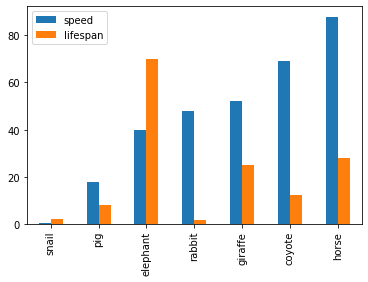

In [58]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

## Genera un grafico de barras con kdf y matplotlib

ks.options.plotting.backend = "matplotlib"

kdf.plot.bar()

<AxesSubplot:>

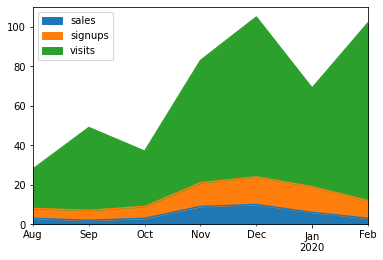

In [59]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

ks.options.plotting.backend = "matplotlib"

kdf.plot.area()

### Utilizando SQL en Koalas

In [60]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [61]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100

ks.sql('SELECT * FROM {kdf} WHERE pig > 100')

,year,pig,horse
0,2003,489,281
1,2009,675,600
2,2014,1776,1900


In [62]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [63]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken
ks.sql('SELECT pig, chicken FROM {kdf} INNER JOIN {pdf} ON {kdf}.year = {pdf}.year ORDER BY pig, chicken')

,pig,chicken
0,18,326
1,20,250
2,489,589
3,675,1241
4,1776,2118


### Trabajando con PySpark

In [64]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
type(kdf)

databricks.koalas.frame.DataFrame

In [65]:
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [66]:
spark = SparkSession.builder.getOrCreate()
df_spark = kdf.to_spark()

In [67]:
## muestra los datos
df_spark.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+

